# Heap implementation and benchmarks

In [205]:
%matplotlib inline
import math
import random
import matplotlib.pyplot as plt
import gc
import time

## Implementation

In [206]:
# Min heap
class Heap:
    def __init__(self, list: list, branches: int) -> None:
        self._list = []
        self._branches = branches
        for number in list:
            self.push(number)

# Appends element and restores the heap
    def push(self, value: int) -> None:
        self._list.append(value)

        index = len(self._list) - 1
        parent_index = (index-1) // self._branches

        while parent_index >= 0:
            if value < self._list[parent_index]:
                self._list[index], self._list[parent_index] = self._list[parent_index], self._list[index]
                index = parent_index
                parent_index = ((index-1)//self._branches)

            else:
                break

# Removes min element and restores the heap
    def remove_top(self):
        if len(self._list) == 1:
            return self._list.pop()

        if len(self._list) < 1:
            return None

        min_element = self._list[0]
        self._list[0] = self._list.pop()
        child = [0] * (self._branches + 1)
        index = 0
        k = self._branches
        length = len(self._list)
        
        while True:
            for i in range(1, k + 1):
                child[i] = k * index + i if k * index + i < length else -1
            min_child, min_child_index = float("inf"), 0
            for i in range(1, k + 1):
                if child[i] != -1 and self._list[child[i]] < min_child:
                    min_child_index = child[i]
                    min_child = self._list[child[i]]
            if min_child == float("inf"):
                break
            if self._list[index] > self._list[min_child_index]:
                self._list[index], self._list[min_child_index] = self._list[min_child_index], self._list[index]
            index = min_child_index
        return min_element

## Tests to assure correct implementation

In [207]:
def test_heap():
    # For each branch factor, test if the heap is correct
    def is_heap_correct(heap):
        for i in range(len(heap._list)):
            # 
            parent_index = ((i - 1) // heap._branches)
            if parent_index < 0:
                continue
            if heap._list[i] < heap._list[parent_index]:
                return False
        return True

    for number in [2, 5, 7]:  # Run the test 3 times for 3 branch options
        probe = random.sample(range(300000), 1000)
        heap = Heap(list=probe, branches=number)

        # Test pushing elements onto the heap
        for number in probe:
            heap.push(number)
            assert is_heap_correct(heap) is True

        # Test removing elements from the heap
        while len(heap._list) > 1:
            heap.remove_top()
            assert is_heap_correct(heap) is True

In [208]:
for i, number in enumerate([1, 2, 3]):
    print(i, number)

0 1
1 2
2 3


## Benchmarks

In [209]:
gc.disable() # Disable garbage collector
cases = [2, 5, 7]
sample = [10 ** i for i in range(2, 6)]
probe = random.sample(range(100000), 100000)
create_time_taken = []
for case in cases:
    time_taken_case = []
    for size in sample:
        case_probe = probe[:size]
        start = time.time()
        heap = Heap(list=case_probe, branches=case)
        time_taken_case.append(time.time() - start)
    create_time_taken.append(time_taken_case)

remove_time_taken = []
for case in cases:
    time_taken_case = []
    for size in sample:
        case_probe = probe[:size]
        heap = Heap(list=case_probe, branches=case)
        start = time.time()
        while len(heap._list) > 1:
            heap.remove_top()
        time_taken_case.append(time.time() - start)
    remove_time_taken.append(time_taken_case)


# Plot

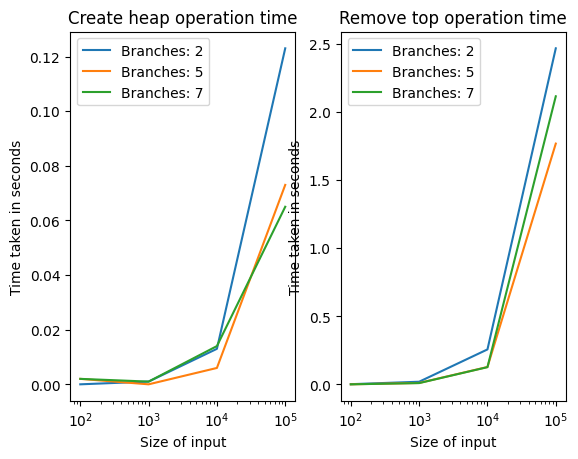

In [210]:
plt.subplot(1, 2, 1)

for i, case in enumerate(cases):
    plt.plot(sample, create_time_taken[i], label=f"Branches: {case}")
plt.title("Create heap operation time")
plt.xlabel("Size of input")
plt.ylabel("Time taken in seconds")
plt.xscale('log')
plt.legend()

plt.subplot(1, 2, 2)
for i, case in enumerate(cases):
    plt.plot(sample, remove_time_taken[i], label=f"Branches: {case}")
plt.title("Remove top operation time")
plt.xlabel("Size of input")
plt.ylabel("Time taken in seconds")
plt.xscale('log')
plt.legend()

